In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


# Separação dos Dados em Treino e Teste

In [3]:
df = pd.read_csv('cicids2017_cleaned.csv')
df.columns = df.columns.str.replace(" ", "_")

# Converter variável categórica para binária
df['Attack_Type'] = df['Attack_Type'].apply(lambda x: "Normal Traffic" if x == "Normal Traffic" else "Attack")

# Separar features e labels
X = df.drop('Attack_Type', axis=1)
y = df['Attack_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Isolation Forest (Diferentes Valores)


=== contamination: 0.01 ===
                precision    recall  f1-score   support

        Attack     0.8241    0.2301    0.3597    425694
Normal Traffic     0.8635    0.9900    0.9225   2095057

      accuracy                         0.8617   2520751
     macro avg     0.8438    0.6100    0.6411   2520751
  weighted avg     0.8569    0.8617    0.8274   2520751


=== contamination: 0.05 ===
                precision    recall  f1-score   support

        Attack     0.6783    0.5180    0.5874    425694
Normal Traffic     0.9065    0.9501    0.9278   2095057

      accuracy                         0.8771   2520751
     macro avg     0.7924    0.7340    0.7576   2520751
  weighted avg     0.8680    0.8771    0.8703   2520751



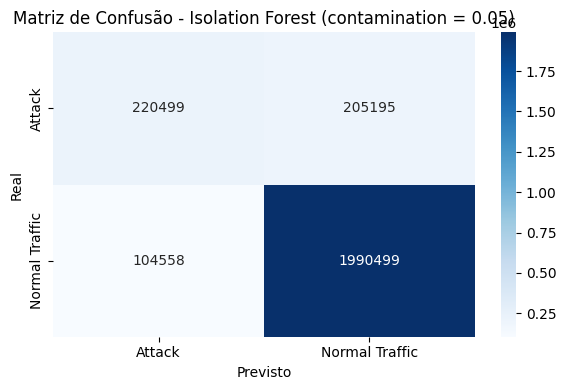


=== contamination: 0.1 ===
                precision    recall  f1-score   support

        Attack     0.5479    0.5962    0.5710    425694
Normal Traffic     0.9165    0.9000    0.9082   2095057

      accuracy                         0.8487   2520751
     macro avg     0.7322    0.7481    0.7396   2520751
  weighted avg     0.8542    0.8487    0.8512   2520751


=== contamination: 0.15 ===
                precision    recall  f1-score   support

        Attack     0.4481    0.5997    0.5129    425694
Normal Traffic     0.9127    0.8499    0.8802   2095057

      accuracy                         0.8077   2520751
     macro avg     0.6804    0.7248    0.6966   2520751
  weighted avg     0.8342    0.8077    0.8182   2520751


=== contamination: 0.2 ===
                precision    recall  f1-score   support

        Attack     0.3805    0.6049    0.4672    425694
Normal Traffic     0.9088    0.7999    0.8509   2095057

      accuracy                         0.7670   2520751
     macro 

In [4]:
y_misto_binary = ["Normal Traffic" if y == "Normal Traffic" else "Attack" for y in y_misto]

# Valores para contamination
contamination_values = [0.01, 0.05, 0.1, 0.15, 0.2]

for contamination in contamination_values:
    print(f"\n=== contamination: {contamination} ===")

    # Criar e treinar o modelo Isolation Forest
    isoForest = IsolationForest(contamination=contamination, random_state=42)
    isoForest.fit(X_train_scaled)

    # Previsão
    y_pred = isoForest.predict(X_test_scaled)
    y_pred_labels = ["Attack" if y == -1 else "Normal Traffic" for y in y_pred]

    # Avaliar
    print(classification_report(y_misto_binary, y_pred_labels, digits=4))

    # Matriz de Confusão
    if contamination == 0.05:
        cm = confusion_matrix(y_misto_binary, y_pred_labels, labels=["Attack", "Normal Traffic"])

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=["Attack", "Normal Traffic"],
                    yticklabels=["Attack", "Normal Traffic"])
        plt.title("Matriz de Confusão - Isolation Forest (contamination = 0.05)")
        plt.xlabel("Previsto")
        plt.ylabel("Real")
        plt.tight_layout()
        plt.show()



# Modelo Local Outlier Factor

  File "c:\Users\zapat\Documents\projetoI\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1548, in _ex


 === LOF ===
                precision    recall  f1-score   support

        Attack     0.0609    0.0180    0.0278    425694
Normal Traffic     0.8254    0.9435    0.8805   2095057

      accuracy                         0.7872   2520751
     macro avg     0.4432    0.4808    0.4542   2520751
  weighted avg     0.6963    0.7872    0.7365   2520751



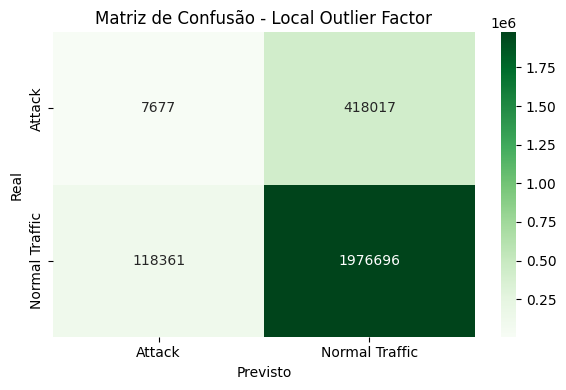

In [5]:
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


y_misto_binary = ["Normal Traffic" if y == "Normal Traffic" else "Attack" for y in y_misto]

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = lof.fit_predict(X_test_scaled)

y_pred_lof_labels = ["Attack" if y == -1 else "Normal Traffic" for y in y_pred_lof]

print("\n === LOF ===")
print(classification_report(y_misto_binary, y_pred_lof_labels, digits=4))

cm_lof = confusion_matrix(y_misto_binary, y_pred_lof_labels, labels=["Attack", "Normal Traffic"])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lof, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Attack", "Normal Traffic"],
            yticklabels=["Attack", "Normal Traffic"])
plt.title("Matriz de Confusão - Local Outlier Factor")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Random Forest Classifier

                precision    recall  f1-score   support

        Attack     0.9965    0.9948    0.9957     85277
Normal Traffic     0.9989    0.9993    0.9991    418874

      accuracy                         0.9985    504151
     macro avg     0.9977    0.9971    0.9974    504151
  weighted avg     0.9985    0.9985    0.9985    504151



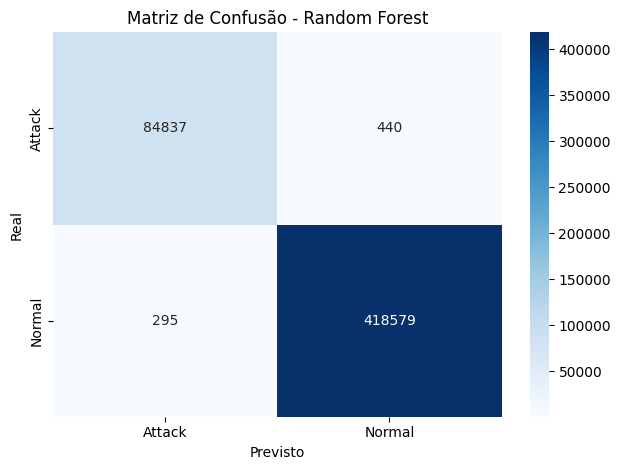

['scaler.pkl']

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, digits=4))

# (8) Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=["Attack", "Normal Traffic"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Attack", "Normal"], yticklabels=["Attack", "Normal"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.show()

# (9) Guardar modelo e scaler
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")